In [2]:
import torch
from torch import nn
import torch.nn.functional as F

- Track long-term dependency in data
- Control what information pass through. And what to update the cell state

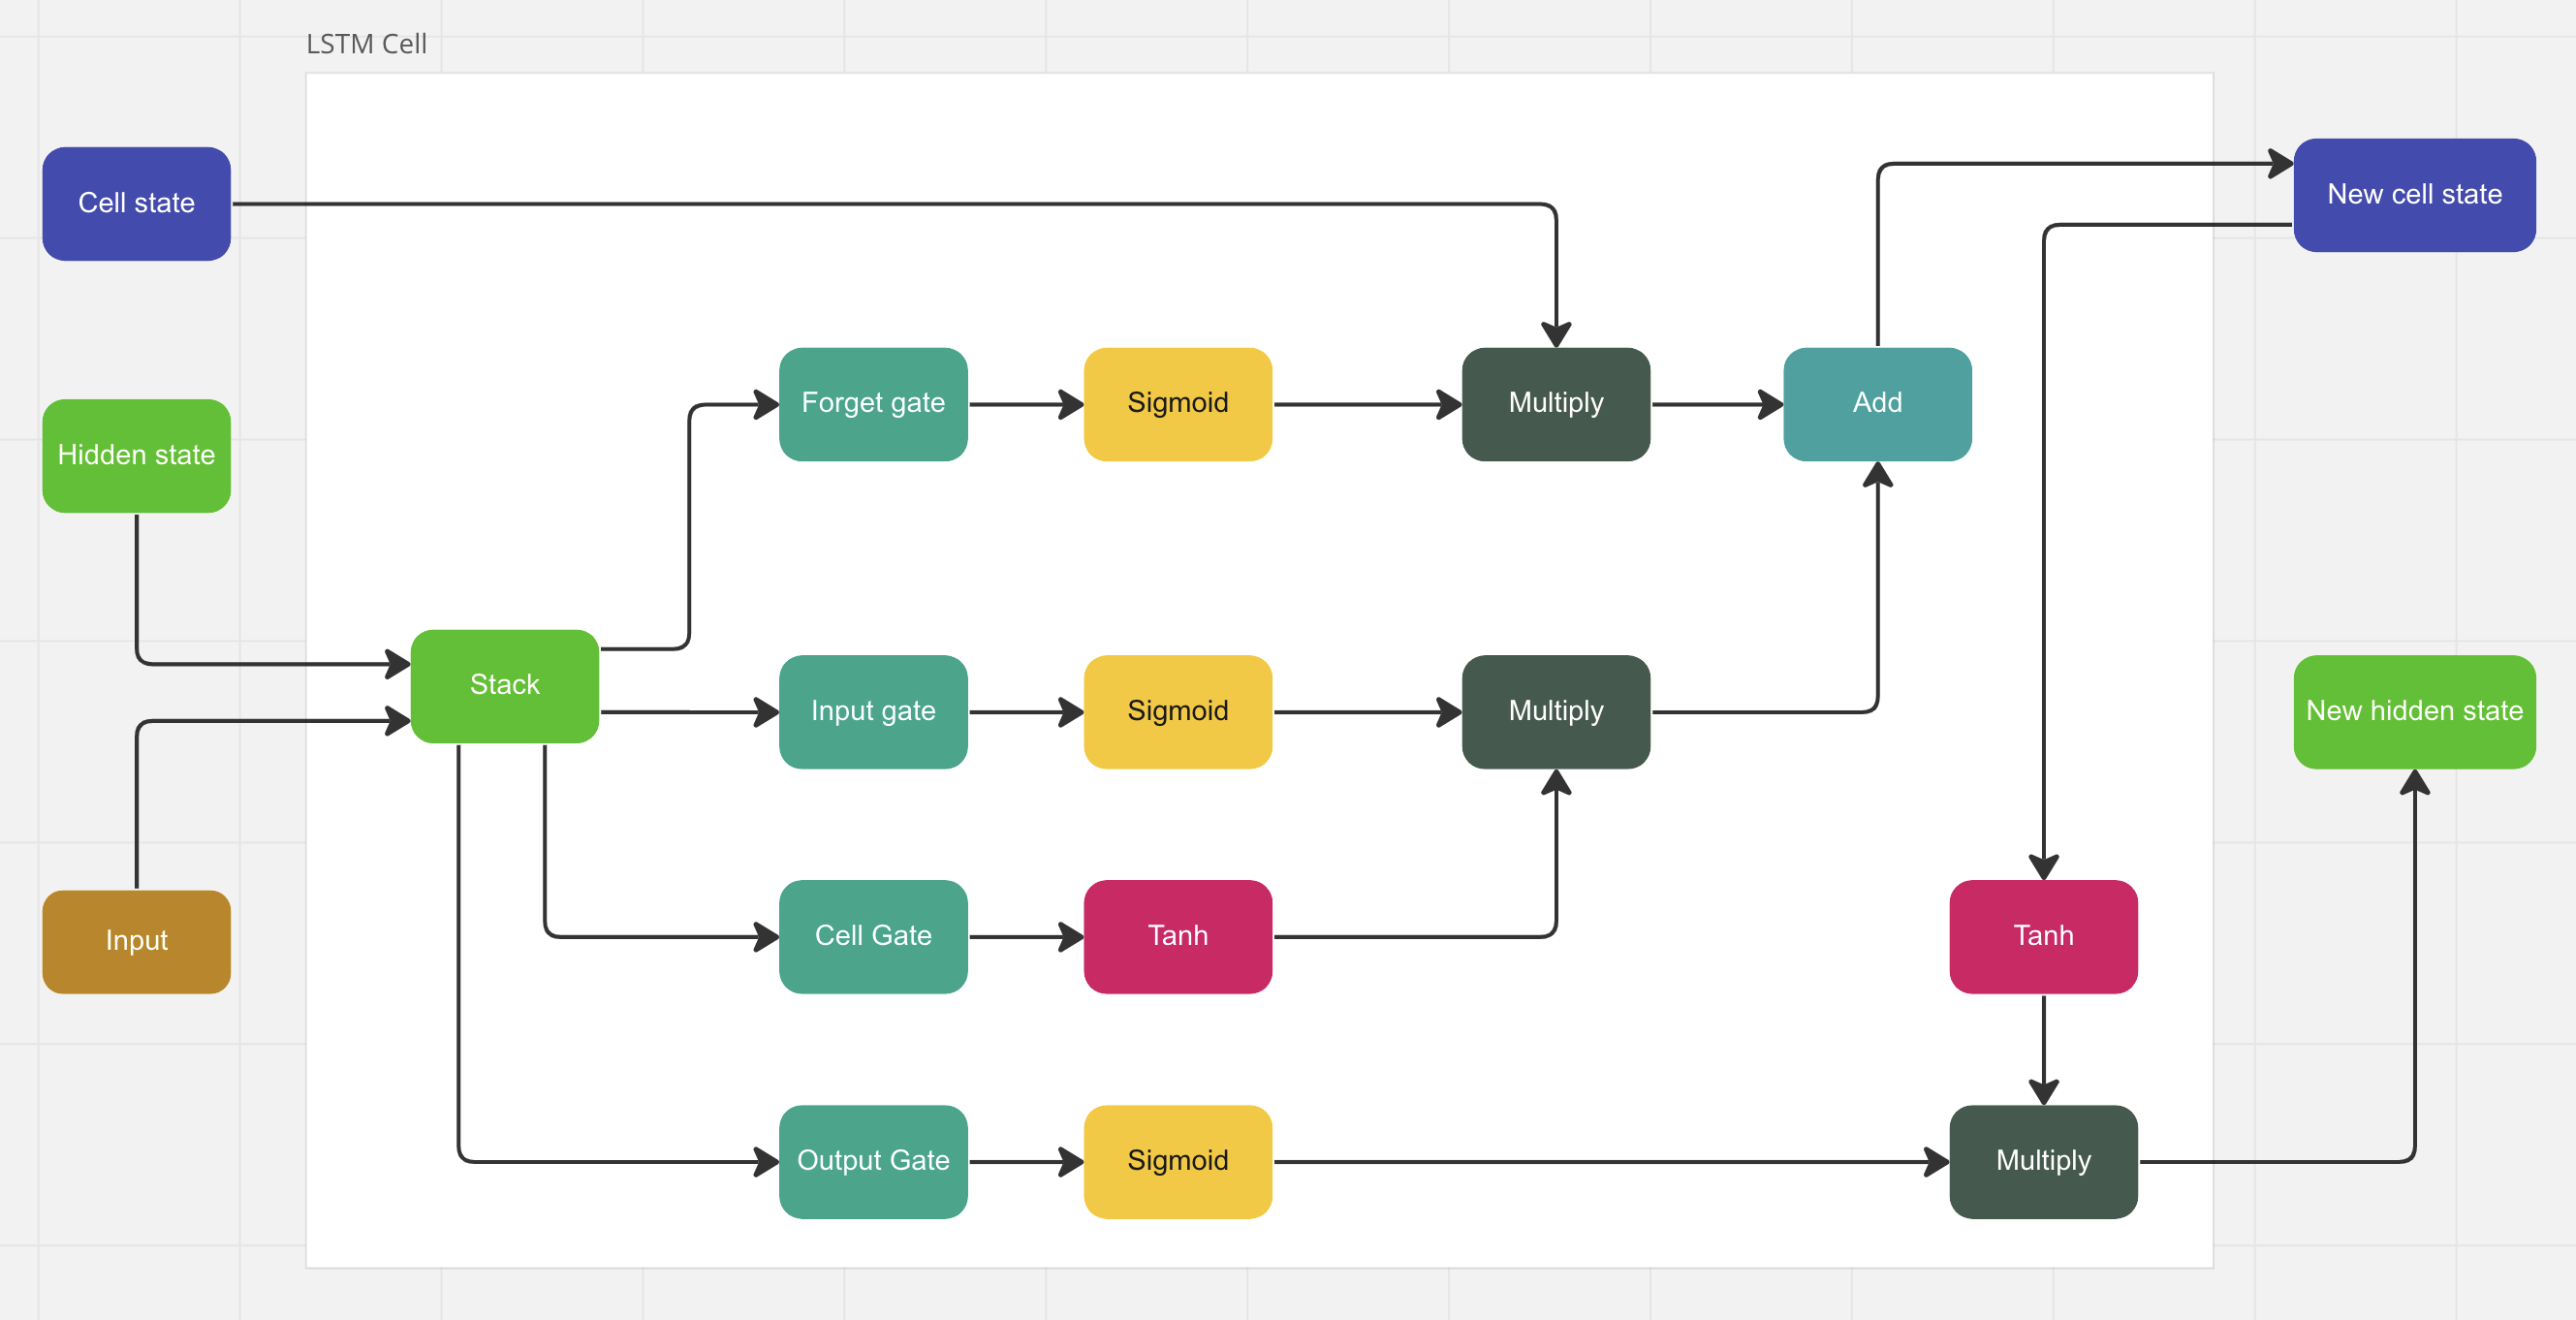

In [46]:
from torch import nn
import torch.nn.functional as F

Write a LSTM Cell from scratch

In [47]:
class LSTMCell(nn.Module):
    def __init__(self, n_input, n_hidden):
        super().__init__()
        self.forget_gate = nn.Linear(n_input + n_hidden, n_hidden)
        self.input_gate = nn.Linear(n_input + n_hidden, n_hidden)
        self.cell_gate = nn.Linear(n_input + n_hidden, n_hidden)
        self.output_gate = nn.Linear(n_input + n_hidden, n_hidden)
    
    def forward(self, current_input, state):
        prev_h, prev_c = state
        stacked_h = torch.stack([prev_h, current_input], dim=1)
        
        # forget gate
        out_of_forget_gate = F.sigmoid(self.forget_gate(stacked_h))
        
        # input gate
        out_of_input_gate = F.sigmoid(self.input_gate(stacked_h))
        
        # cell gate
        out_of_cell_gate = F.tanh(self.cell_gate(stacked_h))
        
        # output gate
        out_of_output_gate = F.sigmoid(self.output_gate(stacked_h))
        
        # calculate new cell state
        new_c = prev_c * out_of_forget_gate + out_of_input_gate * out_of_cell_gate
        
        # calculate new hidden state
        new_h = out_of_output_gate * F.tanh(new_c)
        
        return new_h, (new_h, new_c)

In [48]:
model = LSTMCell(n_input=3, n_hidden=5)

In [29]:
model(torch.randn(3), (torch.randn(3), torch.randn(1)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 8x5)